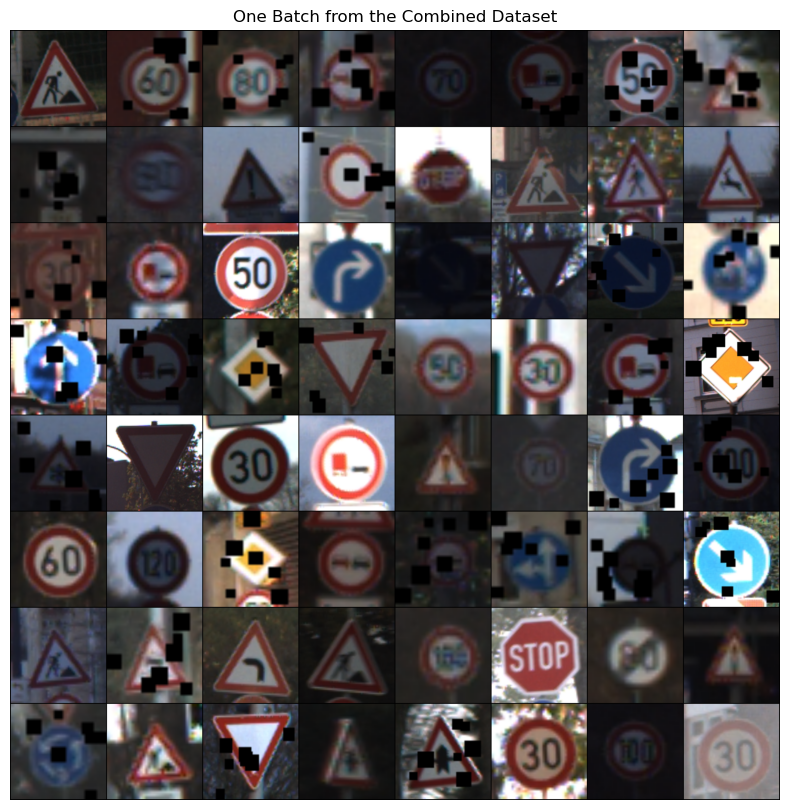

In [6]:
from torch.utils.data import DataLoader, ConcatDataset
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # Convert PIL image to PyTorch tensor
])

original_dataset = datasets.ImageFolder(
    "/work/flemingc/nvan21/projects/COMS_573_Project/Data/Train", transform=transform
)
occlusion_dataset = datasets.ImageFolder(
    "/work/flemingc/nvan21/projects/COMS_573_Project/Data/train_augment", transform=transform
)
combined_dataset = ConcatDataset([original_dataset, occlusion_dataset])

dataloader = DataLoader(combined_dataset, batch_size=64, shuffle=True, num_workers=4)
# Get one batch of images and labels from the DataLoader
data_iter = iter(dataloader)
images, labels = next(data_iter)  # images: [B, C, H, W], labels: [B]

# Create a grid from this batch of images
img_grid = torchvision.utils.make_grid(images, nrow=8)  # adjust nrow based on desired layout

# Convert the tensor to a NumPy array for plotting: [C, H, W] -> [H, W, C]
img_grid = img_grid.permute(1, 2, 0).cpu().numpy()

# Plot the grid
plt.figure(figsize=(10,10))
plt.imshow(img_grid)
plt.axis('off')
plt.title('One Batch from the Combined Dataset')
plt.show()
